In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Exploratória

In [440]:
df = pd.read_csv("desafio.csv",thousands=',',decimal='.')
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.0+ KB


In [442]:
df.isna().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [443]:
# Quantidade de valores únicos em cada coluna
df.nunique()

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

O dataset possui 999 linhas e 16 colunas, como pode-se observar em df.info. A maioria dos dados é de texto, e faltam dados nas colunas Certificate, Meta_score e Gross. A coluna Unnamed é apenas um índice de linhas e por isso, pode ser retirada. A coluna Runtime tem valores em minutos, assim, será retirada a palavra 'min' para torná-la numérica e mais interpretável ao modelo, e o mesmo será feito com a coluna Released Year. As notas no IMDB rating são valores numéricos não inteiros e contínuos, assim, prevê-las é um problema de regressão, já que poderíamos ter filmes com notas mais baixas do que as presentes no dataset, não podemos usar as notas como classes.

In [444]:
df['Runtime']=df['Runtime'].str.strip('min').astype('int64')

In [445]:
df[df['Released_Year']=='PG']

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


Ao tentar converter a coluna Released Year, inicialmente houve um erro devido a um valor 'PG' na coluna que deveria ter somente anos. Assim, pesquisei o título da série no Google e encontrei que foi em 1995, por isso, ele foi substituído por tal valor.

In [446]:
df.loc[df['Released_Year']=='PG','Released_Year']=1995


In [447]:
df['Released_Year']=df['Released_Year'].astype('int64')

In [448]:
df.drop('Unnamed: 0',axis=1).describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.297166,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


Os filmes foram lançados entre 1920 e 2020, com a mediana sendo 1999, isto é, o valor que está na metade da sequência em ordem crescente de anos. Um quarto dos valores vai de 1920 até 1976, e 50% entre 1976 e 2009. Na média, os filmes tem 122 minutos, ou seja, cerca de 2 horas e pontuação no IMDB de 7.95 . A Meta Score tem um valor mínimo bastante desviado da mediana, 28 em comparação com 79, assim, ela será melhor visualizada em um gráfico para aprofundamento. O faturamento varia entre 1305 doláres até mais de 900 milhões, e o número de votos, entre 25 mil e 2.3 milhões, assim, é provável que haja filmes desde pequenos até grandes estúdios internacionais, o que explicaria tais discrepâncias de público e arrecadação.

In [449]:
df['Certificate'].value_counts()

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [450]:
df['Genre'].value_counts()

Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

As classes U, A , UA e R são as mais presentes na coluna Certificate, representando juntas 83.6% dos valores presentes. As classes dessa coluna serão transformadas em encoders numéricos para serem usadas no modelo posteriormente. No caso da coluna Gênero, as classes também podem ser transformadas e separadas, por exemplo, um filme de Aventura e Thriller será caracterizado por um valor verdadeiro em duas novas colunas 'Aventura' e 'Thriller', após o One Hot Encoding, para evitar a criação de colunas excessivas. Isso será feito após a separação do dataset em treino e teste para evitar vazamento de dados.

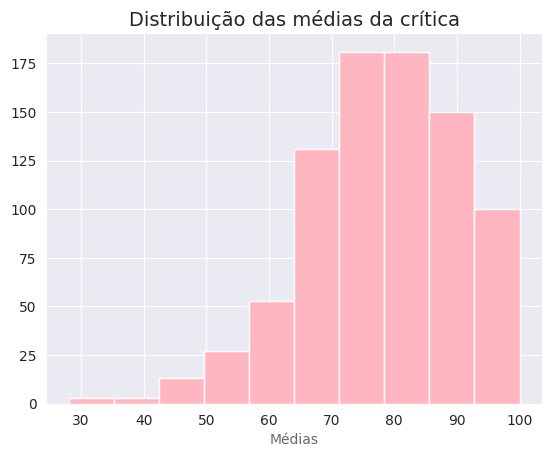

In [451]:
plt.hist(df['Meta_score'],color='lightpink')
plt.title('Distribuição das médias da crítica',fontsize=14)
plt.xlabel("Médias",color='dimgray')
plt.gca().spines[['right','top']].set_visible(False)
plt.show()

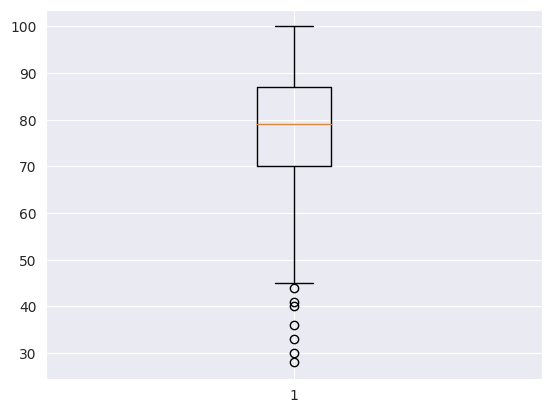

In [452]:
plt.boxplot(df[df['Meta_score']>=28]['Meta_score'])
plt.show()

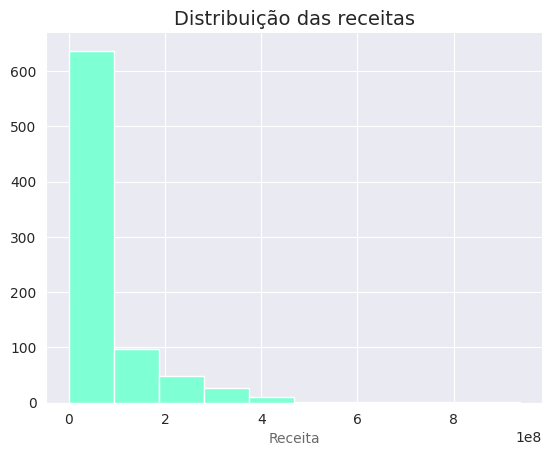

In [453]:
plt.hist(df['Gross'],bins=10,color='aquamarine')
plt.title('Distribuição das receitas',fontsize=14)
plt.xlabel("Receita",color='dimgray')
plt.gca().spines[['right','top']].set_visible(False)
plt.show()

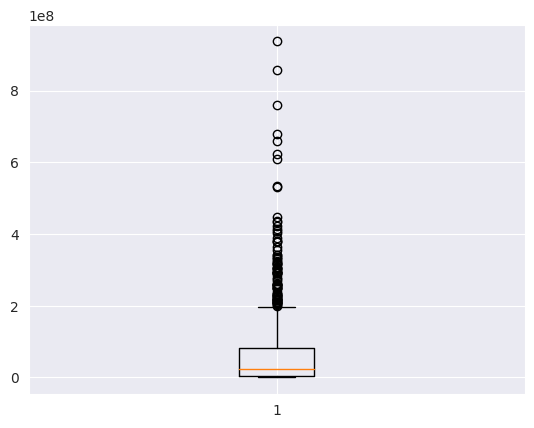

In [454]:
plt.boxplot(df[df['Gross']>0]['Gross'])
plt.show()

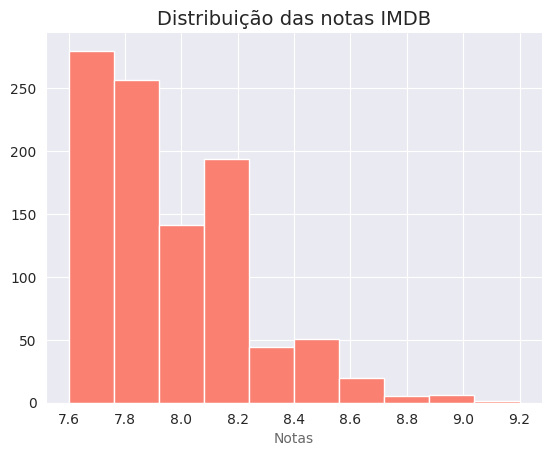

In [455]:
plt.hist(df['IMDB_Rating'],bins=10,color='salmon')
plt.title('Distribuição das notas IMDB',fontsize=14)
plt.xlabel("Notas",color='dimgray')
plt.gca().spines[['right','top']].set_visible(False)
plt.show()

In [456]:
# Contando outliers na receita
q1 = df['Gross'].quantile(0.25)
q3 = df['Gross'].quantile(0.75)
iqr = q3-q1
max = q3+1.5*iqr
# Outliers são valores acima do máximo definido anteriormente
print('Há', df[df['Gross']>max]['Gross'].count(),'outliers no faturamento')

Há 88 outliers no faturamento


A distribuição da crítica é assimétrica à direita assim, as médias estão concentradas entre 70 e 100 pontos. É possível observar que mais de 700 filmes tem faturamento menor que 20 milhões, ou seja, cerca de 70% do dataset. Tanto o Faturamento quanto Meta score tem muitos outliers, o que pode interferir em alguns modelos sensíveis. As notas do IMDB também estão assimétricas, com os menores valores começando em 7.6 até 9.2, sendo as notas mais presentes até 8.2, o que deve afetar a capacidade do modelo de prever notas abaixo de 7.6, já que não terá dados para prever isso.

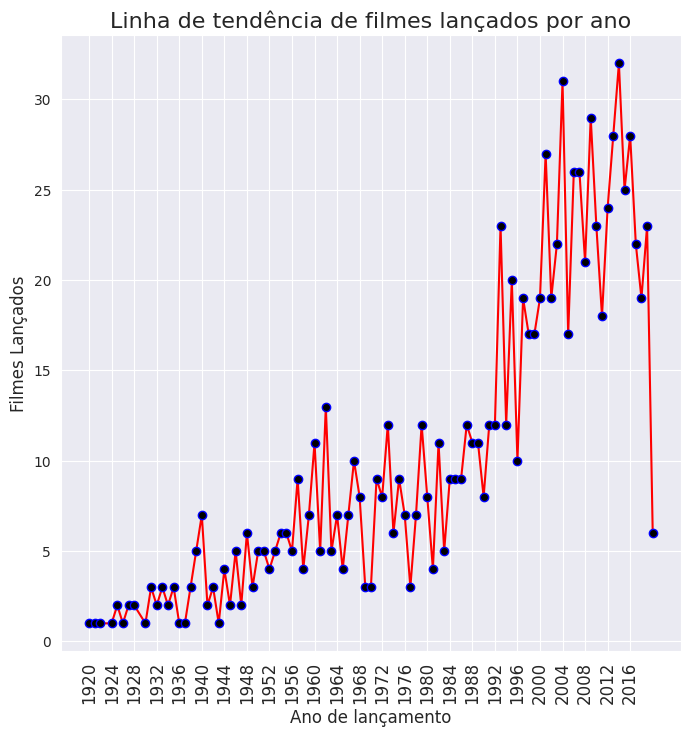

In [532]:
plt.figure(figsize=(8,8))
df['Released_Year'].value_counts().sort_index().plot(kind='line',marker='o',color='r',mec='b',mfc='black')
plt.xticks(np.arange(df['Released_Year'].min(),df['Released_Year'].max(),4),rotation=90,fontsize=12)
plt.xlabel('Ano de lançamento',fontsize=12)
plt.ylabel("Filmes Lançados",fontsize=12)
plt.title("Linha de tendência de filmes lançados por ano",fontsize=16)
plt.show()

É possível observar que há uma tendência de crescimento constante, com a maior quantidade de filmes em 2004, 2014 e 2009, nesta ordem. Também há uma queda abrupta no último ano, 2020, provavelmente porque o dataset foi gerado antes do ano acabar ou devido à pandemia de covid.

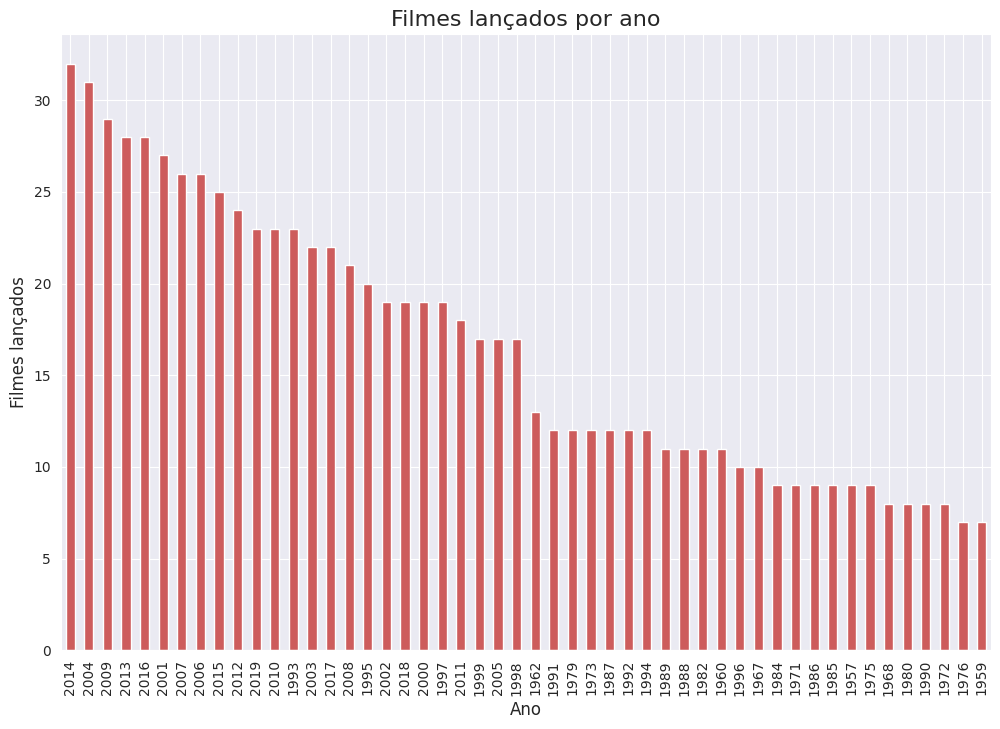

In [533]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(12,8))
df['Released_Year'].value_counts(sort = True)[:50].plot(kind = "bar",color='indianred')
plt.xlabel("Ano" , fontsize = 12)
plt.ylabel("Filmes lançados" , fontsize = 12)
plt.title("Filmes lançados por ano" , fontsize = 16)
plt.xticks(fontsize = 10)
plt.show()

In [458]:
# Conta quantos nomes diferentes há em cada coluna
df[['Director','Star1','Star2','Star3','Star4',]].nunique()

Director    548
Star1       659
Star2       840
Star3       890
Star4       938
dtype: int64

Há uma grande quantidade de directores e atores diferentes, assim, vou analisar apenas os mais relevantes.

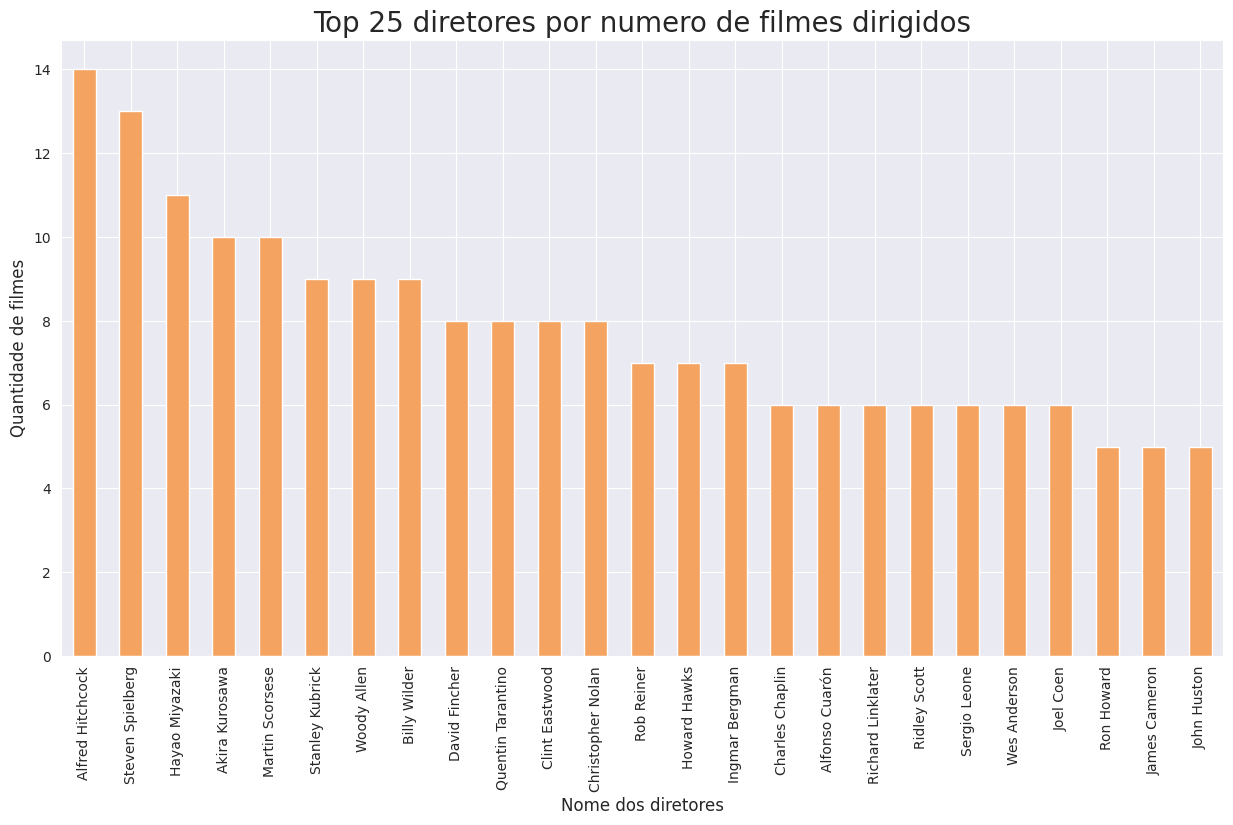

In [530]:
df['Director'].value_counts()[:25].plot(kind = "bar" , figsize = (15,8) , color = 'sandybrown')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Nome dos diretores' , fontsize = 12)
plt.ylabel('Quantidade de filmes' , fontsize = 12)
plt.xticks(rotation=90)
plt.title('Top 25 diretores por numero de filmes dirigidos' , fontsize = 20)
plt.show()

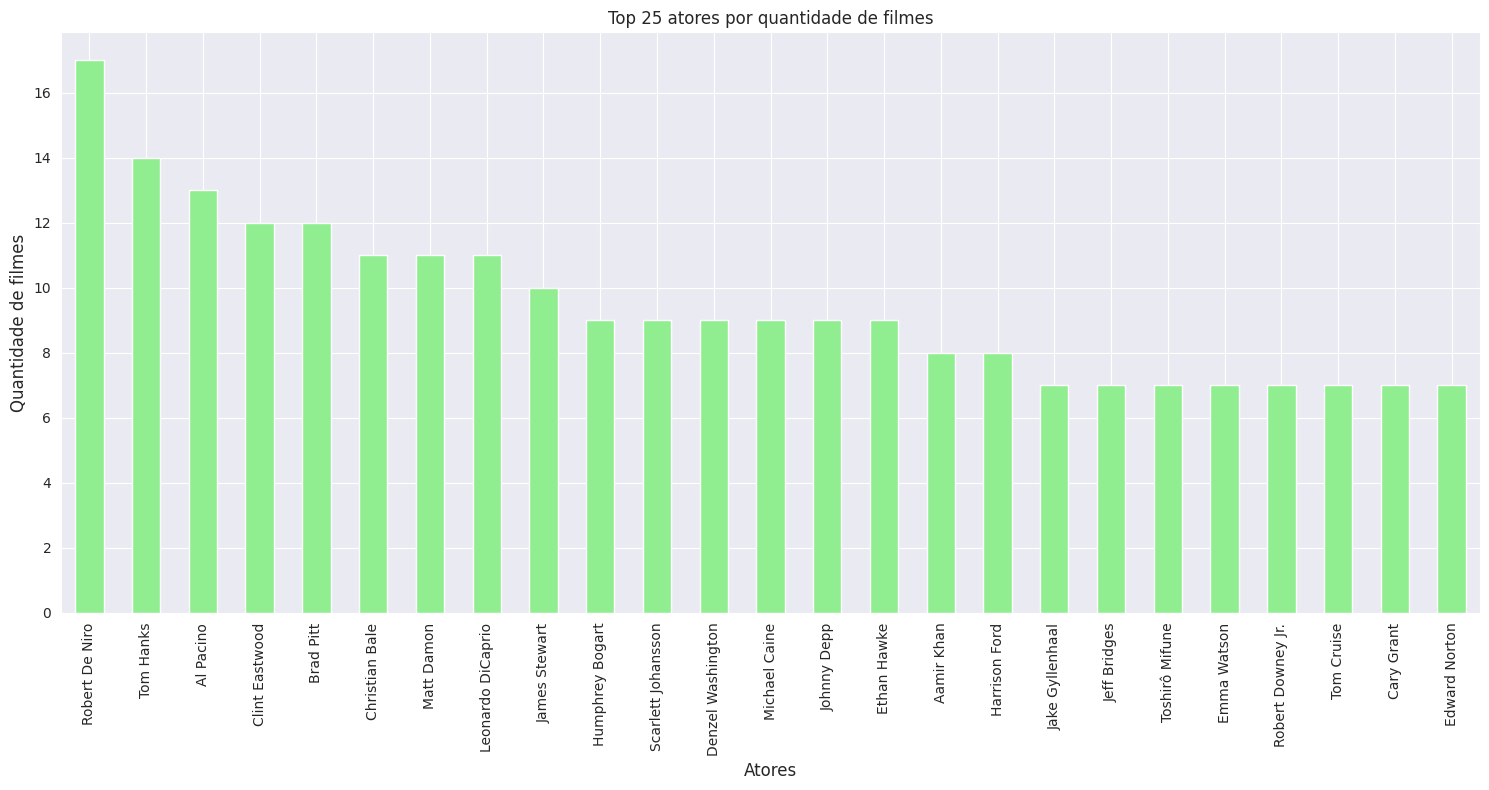

In [536]:
atores = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])

# Conta as ocorrencias de cada ator
atores_counts = atores.value_counts()

# Grafico do histograma
plt.figure(figsize=(10, 6))
atores_counts[:25].plot(kind = "bar" , figsize = (15,8) , color = 'lightgreen')
plt.title('Top 25 atores por quantidade de filmes')
plt.xlabel('Atores',fontsize=12)
plt.ylabel('Quantidade de filmes',fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Entre os cinco maiores diretores, três são americanos e dois são animadores japoneses, a maioria dos restantes são americanos também. O mesmo ocorre com os atores, além de ter uma prevalência de homens, com apenas uma mulher aparecendo na lista dos mais presentes e um ator japonês.

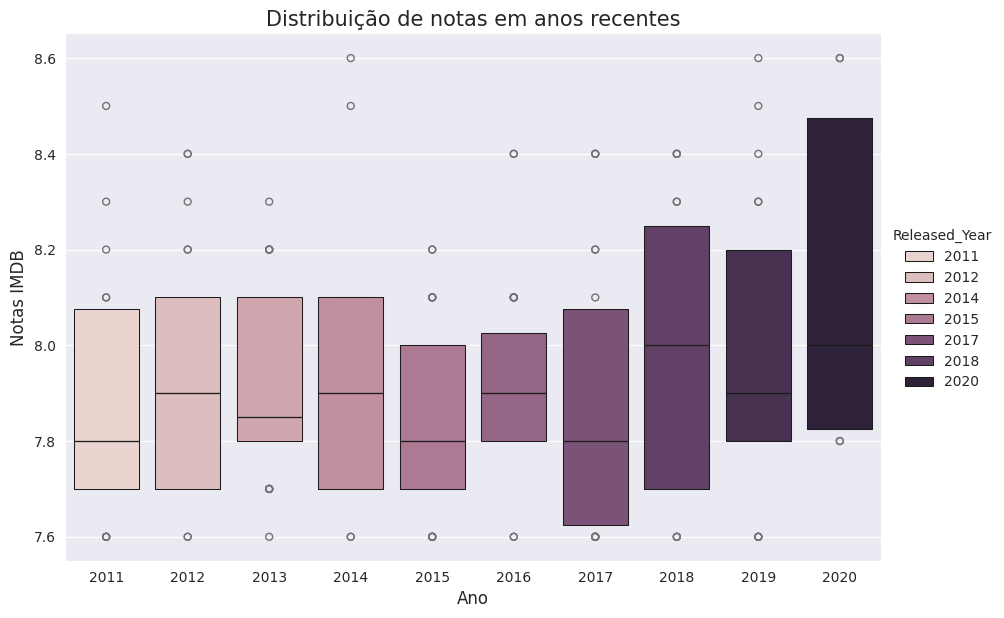

In [516]:
sns.catplot(data = df[df['Released_Year']>2010] , x = "Released_Year" , y = "IMDB_Rating" , kind = "boxen" , height = 6 , aspect = 1.5,hue='Released_Year')
plt.xlabel("Ano",fontsize = 12)
plt.ylabel("Notas IMDB",fontsize = 12)
plt.title("Distribuição de notas em anos recentes",fontsize = 15)
plt.show()

<ipython-input-542-f18b7a906c49>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genero', y='IMDB_Rating', data=melted_df, palette=genre_to_color)


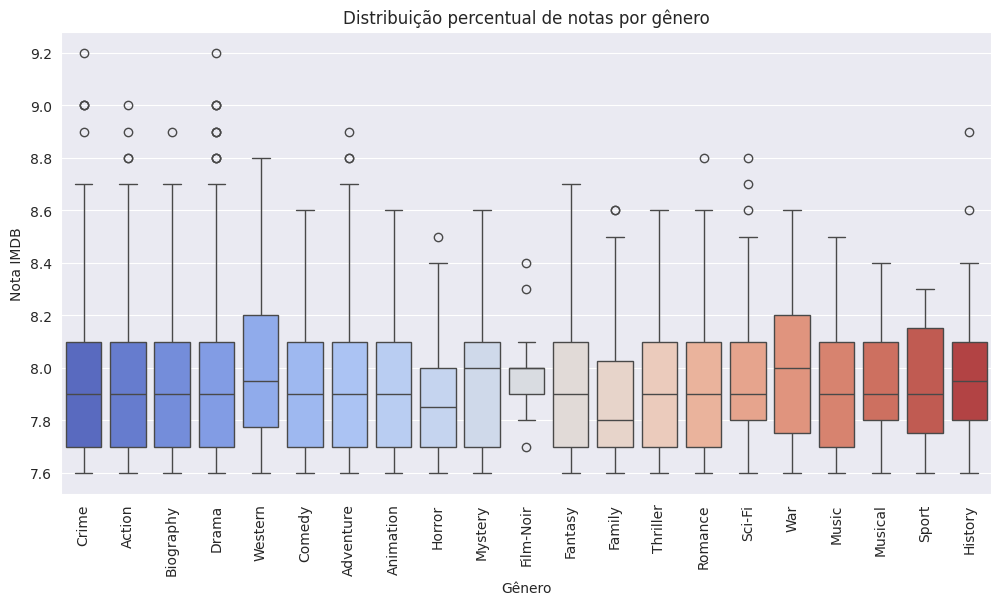

In [542]:
melted_df = df.melt(id_vars=['IMDB_Rating'], value_vars=[0, 1, 2],
                    var_name='TipoGenero', value_name='Genero')

melted_df.drop(columns=['TipoGenero'], inplace=True)

unique_genres = melted_df['Genero'].unique()
palette = sns.color_palette("coolwarm", len(unique_genres))

# Mapeia as cores
genre_to_color = dict(zip(unique_genres, palette))

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genero', y='IMDB_Rating', data=melted_df, palette=genre_to_color)
plt.title('Distribuição percentual de notas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota IMDB')
plt.xticks(rotation=90)
plt.show()

Nos anos recentes, a mediana (linha no meio dos retângulos) das notas variou entre 7.8 e 8.0, sendo que em 2017 houve as menores notas no percentil 25. 2020 tem a maior variação de notas, indicado pela maior distância entre a linha inferior e superior do retângulo roxo. 2020 tem as maiores notas entre 25% a 75%, provavelmente porque tem poucos filmes .

No segundo gráfico, pode-se ver que as maiores medianas são de War, Mistery, Western e History, e que as demais categorias possuem medianas muito próximas, com excessão de Horror e Family. A mediana de Film Noir não pode ser visualizada porque o gráfico é pequeno, porém, ela é maior que maioria das outras, possivelmente, por terem poucas ocorrências de sse gênero. Além disso, Crime, Action e Drama possuem valores excepcionais (outliers) maior ou acima de 9.0 . No geral, as notas por categoria variam entre 7.6 e 8.6, indicando um dataset bastante homogêneo.

In [459]:
# Correlação de Pearson entre variáveis numéricas
df.drop(['Unnamed: 0','Released_Year'],axis=1).corr(method='pearson',numeric_only=True)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime,1.000000,0.242751,-0.031604,0.172483,0.140002
IMDB_Rating,0.242751,1.000000,0.271374,0.479308,0.099393
Meta_score,-0.031604,0.271374,1.000000,-0.020091,-0.030480
No_of_Votes,0.172483,0.479308,-0.020091,1.000000,0.589527
Gross,0.140002,0.099393,-0.030480,0.589527,1.000000


Observa-se que há uma correlação linear positiva moderada (as duas variáveis aumentam juntas) entre o número de votos e p faturamento, de 0.589, assim como entre o número de votos e a nota no IMDB, de 0.479. Isso não necessariamente indica que maior receita causam mais votos , ou que mais votos aumentam a pontuação, apenas indica que há uma relação entre eles. Há uma correlação positiva fraca entre a nota IMDB e o tempo do filme, 0.243, e com a nota Meta, 0.271. A menor correlação é com o faturamento.



 O ano de lançamento foi retirado pois a correlação de Pearson considera variáveis contínuas, mas os anos são discretos, ou seja, só podem assumir determinados valores dentro de um intervalo. Já as demais variáveis tem muitos níveis e por isso podem ser consideradas contínuas.

In [460]:
df.sort_values(['IMDB_Rating','No_of_Votes'],ascending=False).head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,6,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0


## Qual filme recomendaria para alguém desconhecido?
Considerando uma pessoa que não conheço, e a análise acima, eu recomendaria o filme baseado na nota do IMDB e número de votos. Assim, o melhor filme seria The GodFather e em segundo lugar, caso a pessoa prefira um filme mais recente, The Dark Knight.

## Predição do faturamento
Podemos esperar que o faturamento seja alto se o número de votos for alto, e talvez se a nota do IMDB for alta, pois a correlação é mais fraca. Uma hipótese é que filmes com atores mais famosos obtenham maior faturamento e sejam mais assistidos, assim, podem ter maior número de votos e maior nota IMDB.



## Coluna overview
É provável conseguir predizer o gênero do filme a partir do Overview, pois ela contém um breve resumo da história e palavras que se relacionam com o tema. Por exemplo, acima pode-se observar que no Overview de Pulp Fiction, está escrito 'hitmen' (matador de alguel) e o filme é de Crime e Drama.

In [461]:
# Separa os gêneros em colunas diferentes
df = pd.concat([df, df['Genre'].str.split(', ', expand=True)], axis=1)
# Retira a antiga coluna gênero
df.drop('Genre',axis=1,inplace=True)

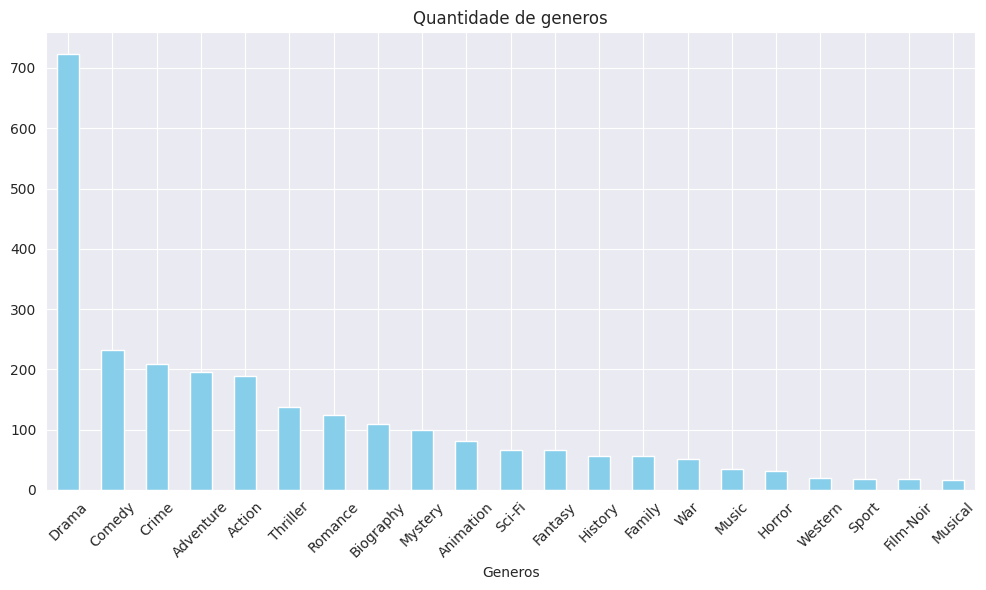

In [520]:
genres = pd.concat([df[0], df[1], df[2]])

# Conta as ocorrencias de cada genero
genre_counts = genres.value_counts()

# Grafico do histograma
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Quantidade de generos')
plt.xlabel('Generos')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O gênero Drama é o mais presente, em cerca de 70% do dataset, seguido de Comédia, Crime, Aventura e Ação.

# Modelo

In [462]:
from sklearn.model_selection import train_test_split

# Divide em dados de treino e teste
X_train,X_test,y_train,y_test = train_test_split(df.drop('IMDB_Rating',axis=1),df['IMDB_Rating'],test_size=0.2,random_state=42)

# Reseta os indices das linhas
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

Segundo as pesquisas que fiz na [wikipedia](https://en.wikipedia.org/wiki/Central_Board_of_Film_Certification)
 e no site do [imdb](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#), as categorias de Certificate tem o seguintes significados:




 GP, PG e PG-13: similares,  significam que os pais devem acompanhar crianças e crianças abaixo de 13 anos, respectivamente.

TV-14 - adolescentes


Approved e Passed- categorias pré 1968 (moralmente aceitos).




R - menores de 17 anos não permitidos ou apenas para maiores de 18 anos
A - apenas para maiores de 18 anos (conteúdo sexual)
TV-MA - adultos

16 - maiores de 16 anos



u ou G- para todas as idades

UA -supervisão dos pais para menores de idade ou unrestricted public (livre para todos os públicos), a depender do país

U/A - livre , mas crianças menores de 12 anos recomenda-se estar acompanhadas



---



Assim, posso simplificar algumas categorias, com base em suas similaridades


* PG, PG-13, TV-14, GP: renomear como P
* Approved e Passed: renomear S
* R, TV-MA, A: renomear como R
* 16: renomear como T
* U, UA, U/A, G: renomear como U
* Unrated ou sem categoria: renomear como N

As transformações serão feitas apenas nas classes dos dados de treino, e caso alguma categoria apareça apenas no teste, ela será ignorada, para evitar que os dados vazem. Isso simula uma situação real em que não se tem acesso aos dados que devem ser previstos.










In [463]:
# Confere a quantidade de valores vazios da coluna
X_train['Certificate'].isna().sum()

79

In [464]:
# Confere a quantidade de cada categoria da coluna
X_train['Certificate'].value_counts()

Certificate
U           187
UA          149
A           147
R           123
PG-13        30
Passed       28
PG           27
G            11
Approved      8
TV-PG         3
GP            2
16            1
Unrated       1
TV-14         1
TV-MA         1
U/A           1
Name: count, dtype: int64

In [465]:
import math

def categorias_cert(X, ind):
    for i in ind:
        if X['Certificate'][i] in ['UA', 'U', 'U/A', 'G']:
            X.loc[i, 'Certificate'] = 'U'
        elif X['Certificate'][i] in ['PG', 'PG-13', 'TV-14', 'TV-PG', 'GP']:
            X.loc[i, 'Certificate'] = 'P'
        elif X['Certificate'][i] in ['R', 'A', 'TV-MA']:
            X.loc[i, 'Certificate'] = 'A'
        elif X['Certificate'][i] in ['Approved', 'Passed']:
            X.loc[i, 'Certificate'] = 'S'
        elif X['Certificate'][i] == '16':
            X.loc[i, 'Certificate'] = 'T'
        elif X['Certificate'][i] == 'Unrated':
            X.loc[i, 'Certificate'] = 'N'
        elif pd.isnull(X['Certificate'][i]):
            X.loc[i, 'Certificate'] = 'N'
      # Criar uma matriz binária
    X_cert = pd.get_dummies(X['Certificate'],dtype=int)
    X = pd.concat([X, X_cert],axis=1)

    return X

In [466]:
# Indice das linhas
ind = X_train['Certificate'].index
X_train = categorias_cert(X_train,ind)

# Mesmo processo para o teste, não há vazamentos de dados pois a função so considera categorias presentes no treino
ind = X_test['Certificate'].index
X_test = categorias_cert(X_test,ind)

In [467]:
def gens(X_train):
  new_col_names = []
  col_gens = [0,1,2]
  # Passa pelas três colunas de gênero
  for col in col_gens:
    for n_linha,cat in X_train[col].items():
      # Se o genero já não está na lista, ele é adicionado
      if cat not in new_col_names:
        new_col_names.append(cat)

  m,_ = X_train.shape
  new_df_gen = pd.DataFrame()
  # Inicializa as colunas com zeros
  for i in new_col_names:
    new_df_gen[i] = np.zeros((m))

  # # Preenchendo as colunas com um (codificação binária)

  # Percorre as tres colunas originais de genero
  for col in col_gens:
    # Percorre as linhas do dataset original
    for n_linha,cat in X_train[col].items():
      # Se a categoria existe no dataset com as categorias nomeadas por coluna, coloca o valor 1 na linha e coluna e respectiva
      if cat in new_df_gen.columns:
        new_df_gen.loc[n_linha,cat] = 1
  return new_df_gen,new_col_names

def gen_test(X_test, new_df_gen, new_col_names):
  m,_ = X_test.shape
  col_gens = [0,1,2]
  new_df_gen_t = pd.DataFrame()
  # Inicializa as colunas com zeros
  for i in new_col_names:
    new_df_gen_t[i] = np.zeros((m))

  # Preenchendo as colunas com um (codificação binária)

  # Percorre as tres colunas originais de genero
  for col in col_gens:
    # Percorre as linhas do dataset original
    for n_linha,cat in X_test[col].items():
      # Se a categoria existe no dataset  DE TREINO com as categorias nomeadas por coluna, coloca o valor 1 na linha e coluna e respectiva
      if cat in new_df_gen.columns:
        new_df_gen_t.loc[n_linha,cat] = 1
  return new_df_gen_t


new_df_gen,new_col_names = gens(X_train)
new_df_gen_t = gen_test(X_test,new_df_gen,new_col_names)

X_train = pd.concat([X_train,new_df_gen],axis=1)
X_test = pd.concat([X_test,new_df_gen_t],axis=1)

X_train.drop(columns=[0,1,2],inplace=True)
X_test.drop(columns=[0,1,2],inplace=True)

Vou retirar as colunas que não acrescentam informação ao modelo, como Unnamed: 0 e Titulo, por serem apenas tipos de índices. Além disso, também testarei modelos sem os nomes de diretores e atores pois teria que criar mais de 1000 novas colunas, apenas considerando diretor e star1, o que deixaria o modelo com um tempo de processamento muito grande. A coluna Overview sreá retirada, já que ela fornece pouca informação por ser apenas uma frase e além disso, está muito relacionada ao gênero do filme, e assim, não acrescentará muito ao modelo.

In [468]:
retiradas = ['Unnamed: 0','Director','Star1','Star2','Star3','Star4','Series_Title','Overview','Certificate']
X_train.drop(columns= retiradas,inplace=True)
X_test.drop(columns = retiradas, inplace=True)

# Verificando os valores vazios
print(X_train.isna().sum())

# Substitui os valores vazios pela mediana dos dados
median_meta = X_train['Meta_score'].median()
median_gross = X_train['Gross'].median()

for i in X_train.index:
  if pd.isnull(X_train['Meta_score'][i]):
    X_train.loc[i,'Meta_score'] = median_meta
  if pd.isnull(X_train['Gross'][i]):
    X_train.loc[i,'Gross'] = median_gross

# Alinha os dois datasets tal que eles tenham a mesma configuração de colunas
_,X_test = X_train.align(X_test,join='left',axis=1)

# Reordena as colunas para a mesma ordem do treino
X_test.reindex(X_train.columns,axis=1)

# Converte nomes das colunas para strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

Released_Year      0
Runtime            0
Meta_score       119
No_of_Votes        0
Gross            134
A                  0
N                  0
P                  0
S                  0
T                  0
U                  0
Biography          0
Crime              0
Action             0
Mystery            0
Comedy             0
Animation          0
Drama              0
Horror             0
Adventure          0
Family             0
Fantasy            0
Western            0
Film-Noir          0
Thriller           0
Romance            0
None               0
Music              0
War                0
History            0
Musical            0
Sci-Fi             0
Sport              0
dtype: int64


## Escolha do modelo

Como o objetivo é tentar prever vários valores numéricos com casas decimais entre 1 a 10, este é um problema de regressão numérica.

Os atributos não possuem distribuições normais e tem diferentes escalas, por exemplo, os anos estão na casa dos milhares, e o faturamento varia entre milhares e milhões. Assim, decidi testar métodos baseados em árvores de decisão, pois eles não são sensíveis a essas magnitudes. O método Random Forest regressor pode lidar com valores float dos atributos, enquanto o Forest Classifier não pode, por isso o primeiro foi escolhido.

Desvantagens desse método incluem overfitting se as árvores forem muito profundas, instabilidade, de forma que pequenas mudanças nos dados podem mudar muito a árvore, e lentidão nas predições após o treino, o que pode ser ruim em produção.

Outro método testado é o Hist Gradient Boosting Regressor, também um modelo que combina várias árvores de regressão, mas de forma que em cada estágio a próxima árvores tenta minimizar os erros anteriores. Além disso ele é capaz de lidar com datasets grandes por usar métodos baseados em histogramas, e assim, ser mais rápido cque o gradient boost comum.  Suas principais vantagens são a capacidade de lidar com valores faltantes e ser robusto a outliers. Porém, também tem propensão a overfitting se a taxa de aprndizado for alta e é menos interpretável a humanos.

## Escolha de métricas

O erro médio quadrático mede a diferença entre o valor real (de teste) e o previsto, elevado ao quadrado, soma todos as diferenças quadradas e divide pelo número de amostras. Ou seja, ele mede a "distância" linear média de erro entre os valores reais e previstos. Assim, ele é capaz de medir a proporção da variação do target que é explicado pelos atrbutos, logo, mede a efetividade geral do modelo.

In [469]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [470]:
X_train.head()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,A,N,P,S,T,...,Film-Noir,Thriller,Romance,None,Music,War,History,Musical,Sci-Fi,Sport
0,2004,152,73.0,138356,75331600.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1967,105,79.0,45434,39481.0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994,160,79.0,49300,24149632.0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997,134,52.0,131101,3796699.0,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,107,67.0,390334,7757130.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [471]:
from sklearn.pipeline import Pipeline
# Inicializa o classificador
hist = HistGradientBoostingRegressor(random_state=42,loss='squared_error')
hist.fit(X_train,y_train)
y_pred_hist = hist.predict(X_test)

print('Erro médio quadrático do HistGradientBoost Regressor',round(mean_squared_error(y_test, y_pred_hist),4))



Erro médio quadrático do HistGradientBoost Regressor 0.043


Como os dados de teste tem valores faltando nas colunas Meta e Gross, e o Random Forest Regressor no scikit learn não consegue processar valores Nan, eles serão preenchidos com a mediana do treino, e a coluna T, com valores zero, já que não há nenhuma linha com essa categoria.

In [472]:
for i in X_test.index:
  if pd.isnull(X_test['Meta_score'][i]):
    X_test.loc[i,'Meta_score'] = median_meta
  if pd.isnull(X_test['Gross'][i]):
    X_test.loc[i,'Gross'] = median_gross
X_test['T'] = np.zeros(X_test.shape[0])

re = RandomForestRegressor(random_state=42)

re.fit(X_train,y_train)
y_pred_re = re.predict(X_test)
print('Erro médio quadrático do Random Forest Regressor',round(mean_squared_error(y_test, y_pred_re),4))

Erro médio quadrático do Random Forest Regressor 0.0376


## Previsão de nota do filme 'The Shawshank Redemption'


In [473]:
data = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': ['1994'],
 'Certificate': ['A'],
 'Runtime': ['142 min'],
 'Genre': ['Drama'],
 'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
 'Meta_score': [80.0],
 'Director': ['Frank Darabont'],
 'Star1': ['Tim Robbins'],
 'Star2': ['Morgan Freeman'],
 'Star3': ['Bob Gunton'],
 'Star4': ['William Sadler'],
 'No_of_Votes': [2343110],
 'Gross': ['28,341,469']}


Retirando as colunas citadas no pré processamento. A coluna Certificate será transformada nas colunas, A,S,P,T,U com valores binários. A coluna Gross terá as vírgulsa retiradas e Runtime, a palavra min retirada.

In [474]:
data = pd.DataFrame(data)
data['Runtime']=data['Runtime'].str.strip('min').astype('int64')
data['Released_Year']=data['Released_Year'].astype('int64')
data['Gross']=data['Gross'].str.replace(',','')
ind = data['Certificate'].index
data = categorias_cert(data,ind)

# Separa os gêneros em colunas diferentes
data = pd.concat([data, data['Genre'].str.split(', ', expand=True)], axis=1)
data[1] = None
data[2] = None
# Retira a antiga coluna gênero
data.drop('Genre',axis=1,inplace=True)
new_df_data_test = gen_test(data,new_df_gen,new_col_names)


retiradas = ['Director','Star1','Star2','Star3','Star4','Series_Title','Overview','Certificate']
data.drop(columns= retiradas,inplace=True)


# Alinha os dois datasets tal que eles tenham a mesma configuração de colunas
_,data = X_train.align(data,join='left',axis=1)

# Reordena as colunas para a mesma ordem do treino
data.reindex(data.columns,axis=1)

# Converte nomes das colunas para strings
data.columns = data.columns.astype(str)

In [535]:
data.head()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,A,N,P,S,T,...,Film-Noir,Thriller,Romance,None,Music,War,History,Musical,Sci-Fi,Sport
0,1994,142,80.0,2343110,28341469,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [534]:
print(re.predict(data))

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Resultado
A nota seria 8.66, se fosse uma só casa decimal, 8.7. A nota real no site do IMDB é 9.3 de 10, assim, poderia ser caracterizado como um outlier no dataset de treino, o que mostra porque o modelo erra por 0.6.

## Salvando modelo

In [ ]:
import joblib

# Salvar o modelo
joblib.dump(re, 'model.pkl')

# Carregar o modelo model
loaded_model = joblib.load('model.pkl')

# # Uso do modelo - descomentar estas linhas para uso
# y_pred_model = loaded_model.predict(dado_teste)
# # Checar o erro
# mean_squared_error(y_test, y_pred_model)